# Обробка та аналіз БМД

Лабораторна робота №8

Виконав студент групи БС-81

Лукашевич Максим

In [3]:
import scipy.stats as ss
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
dat1 = [34, 31, 30, 36, 29, 30, 31, 35, 32, 33]
dat2 = [35, 35, 34, 34, 33, 33, 37, 38, 37, 38]
dat3 = [35, 31, 38, 57, 54, 29, 38, 35, 40, 43]
dataframe = pd.DataFrame({"1_g":dat1, 
                          "2_g":dat2,
                          "3_g":dat3})

dataframe

,1_g,2_g,3_g
0,34,35,35
1,31,35,31
2,30,34,38
3,36,34,57
4,29,33,54
5,30,33,29
6,31,37,38
7,35,38,35
8,32,37,40
9,33,38,43


1. Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).

In [29]:
n = dataframe.shape[0]
sum1=sum(dataframe.iloc[:,0]/n)
sum2=sum(dataframe.iloc[:,1]/n)
sum3=sum(dataframe.iloc[:,2]/n)

sd1=dataframe.iloc[:,0].std()
sd2=dataframe.iloc[:,1].std()
sd3=dataframe.iloc[:,2].std()

new_dat = dataframe
new_dat.loc["Average"] = [sum1,sum2,sum3]
new_dat.loc["Standard deviation"] = [sd1,sd2,sd3]

new_dat

,1_g,2_g,3_g
0,34.000000,35.00000,35.00000
1,31.000000,35.00000,31.00000
2,30.000000,34.00000,38.00000
3,36.000000,34.00000,57.00000
4,29.000000,33.00000,54.00000
5,30.000000,33.00000,29.00000
6,31.000000,37.00000,38.00000
7,35.000000,38.00000,35.00000
8,32.000000,37.00000,40.00000
9,33.000000,38.00000,43.00000


2. Побудувати графік розкиду в групах.

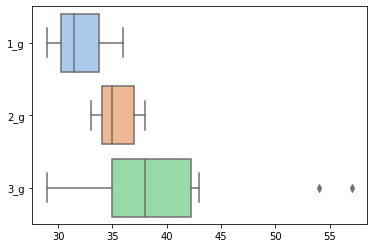

In [27]:
sns.boxplot(data=dataframe, 
            orient='h', 
            palette='pastel')

3-4. Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз. Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці.

In [30]:
def dispersia(data):
    n = data.shape[0]
    T1 = sum(data.iloc[:,0])
    T2 = sum(data.iloc[:,1])
    T3 = sum(data.iloc[:,2])
    Tsum2 = pow(T1, 2) + pow(T2, 2) + pow(T3, 2)
    c = data.shape[1]
    N = n * c
    sumXi2 = (T1 + T2 + T3) ** 2
    const = sumXi2 / N
    xi2 = 0
    sumxi = 0
    
    for i in range (c):
        for j in range(len(data.iloc[:,i-1])):
            sumxi += (data.iloc[j][i])**2
    
    SSfact = Tsum2 / n - const
    SSzagal = sumxi - const
    SSvipadk = SSzagal - SSfact
    
    dfact = c - 1 
    dzagal = N - 1 
    dvipadk = dzagal - dfact
    
    MSfact = SSfact / dfact
    MSvipadk = SSvipadk / dvipadk
    
    Femp = MSfact / MSvipadk
    
    print("In group dispersion:  ", SSfact)
    print("All group dispersion: ", SSzagal)
    print("Residual value:       ", SSvipadk)
    print("d fact:               ", dfact)
    print("d comm:               ", dzagal)
    print("d rand:               ", dvipadk)
    print("MS fact:              ", MSfact)
    print("MS rand:              ", MSvipadk)
    print("F empirical:          ", Femp)
    
    table = pd.read_excel("tab.xlsx").iloc[dvipadk,dfact]
    print("Critical val by table: ", table)
    
    if(Femp >= table):
        result = "Zero hypothesis not alowed, equality confirmed"
    else:
        result = "Zero hypothesis alowed, equality not confirmed"

    return result

5. Перевірити результат роботи функції на реальних або сгенерованих даних.

In [33]:
dispersia(dataframe)

In group dispersion:   314.86666666666133
All group dispersion:  1152.1666666666642
Residual value:        837.3000000000029
d fact:                2
d comm:                29
d rand:                27
MS fact:               157.43333333333067
MS rand:               31.01111111111122
F empirical:           5.076675026871985
Critical val by table:  3.3


'Zero hypothesis not alowed, equality confirmed'